In [1]:
print("""
@Description: 数据可视化
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-07-18 13:00:29
""")


@Description: 数据可视化
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-07-18 13:00:29



In [2]:
import sys
sys.path.append('./')
sys.path.append('../')
from check_python_environment import check_packages
pkgs = {
    'matplotlib': '3.0.0',
    'cufflinks': '0.17.0',
    'plotly': '5.0.0',
    'nbformat': '4.2.0',
    
}
check_packages(pkgs)

[OK] Your Python version is 3.11.3 | packaged by Anaconda, Inc. | (main, May 15 2023, 15:41:31) [MSC v.1916 64 bit (AMD64)]


[OK] matplotlib 3.7.1
[OK] cufflinks 0.17.3
[OK] plotly 5.15.0
[OK] nbformat 5.9.1


# 数据可视化

In [3]:
import matplotlib as mpl
print(mpl.__version__)
import matplotlib.pyplot as plt
plt.style.use('ggplot')
mpl.rcParams['font.family'] = 'serif'
# mpl.rcParams['font.sans-serif'] = 'SimSun'
# plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline


3.7.1


## 静态2D绘图

### 一维数据集

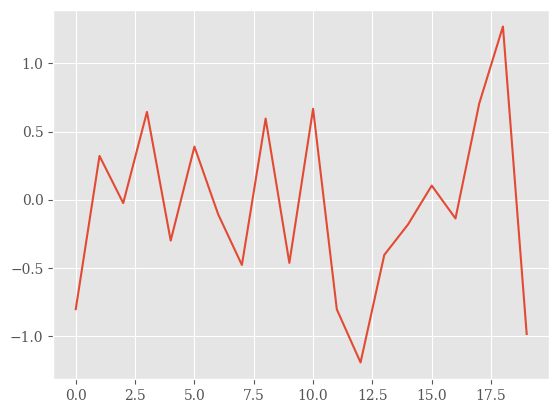

In [4]:
import numpy as np
np.random.seed(1000)
y = np.random.standard_normal(20)
x = np.arange(len(y))
plt.plot(x, y)

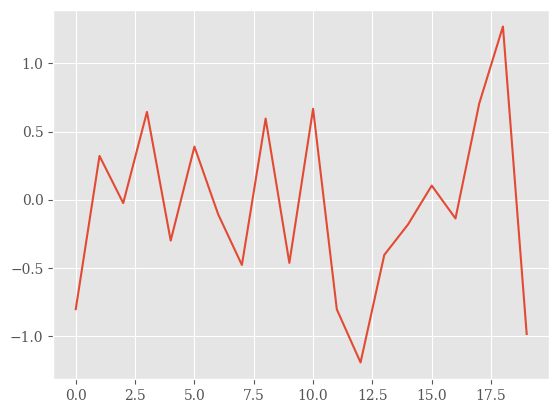

In [5]:
plt.plot(y)

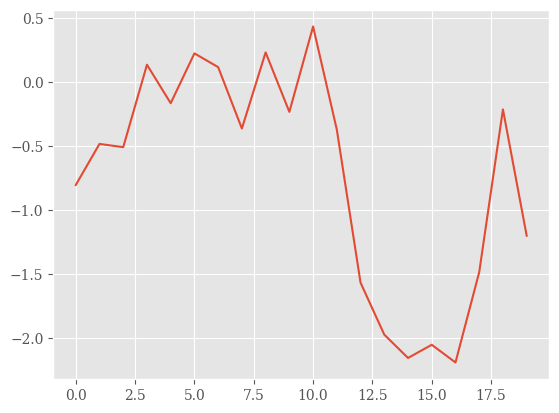

In [6]:
plt.plot(y.cumsum())

(-0.9500000000000001, 19.95, -2.322818663749045, 0.5655085808655865)

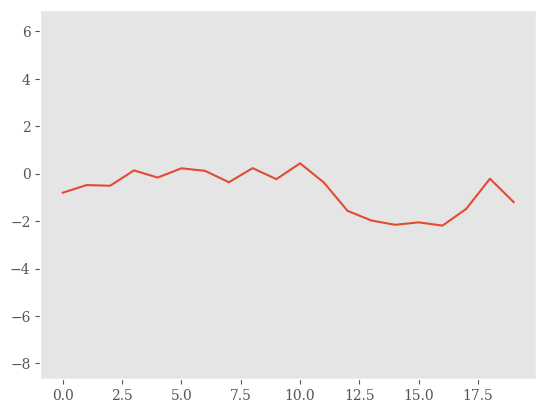

In [7]:
plt.plot(y.cumsum())
plt.grid(False)
plt.axis('equal')

(-3.1915310617211072, 1.4342209788376488)

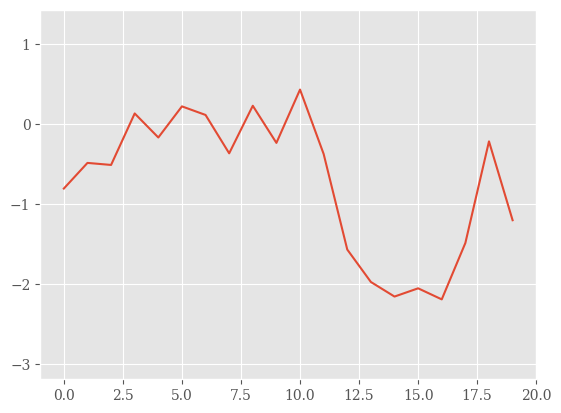

In [8]:
plt.plot(y.cumsum())
plt.xlim(-1, 20)
plt.ylim(np.min(y.cumsum()) - 1, np.max(y.cumsum()) + 1)

Text(0.5, 1.0, 'A Simple Plot')

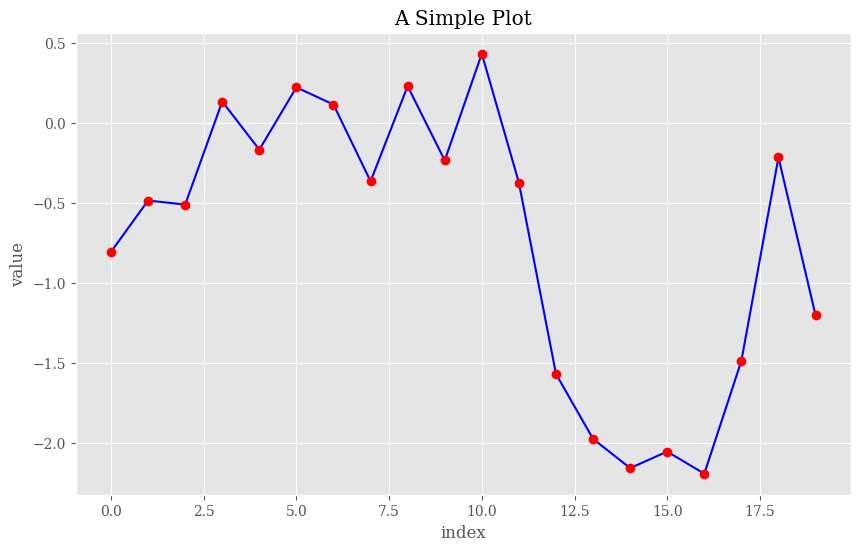

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(y.cumsum(), 'b', lw=1.5)
plt.plot(y.cumsum(), 'ro')
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Simple Plot')

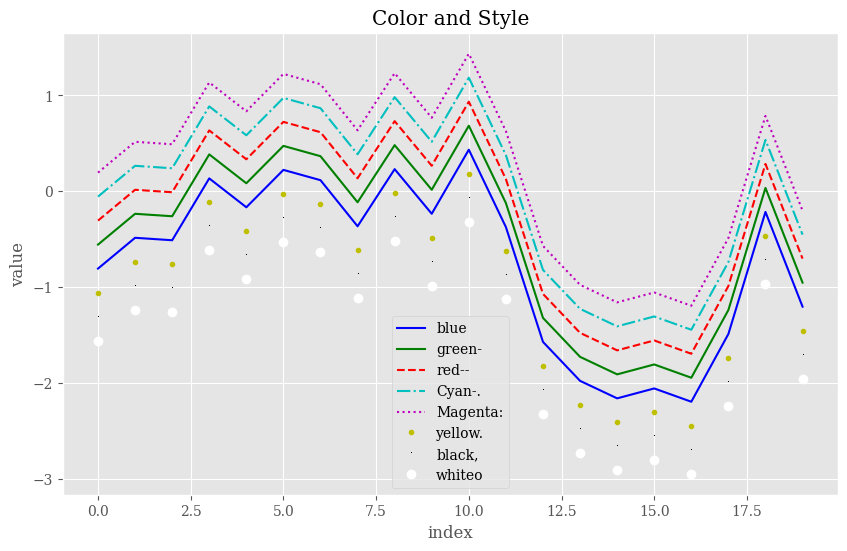

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(y.cumsum(), 'b', lw=1.5)
plt.plot(y.cumsum() + .25, 'g-', lw=1.5)
plt.plot(y.cumsum() + .5, 'r--', lw=1.5)
plt.plot(y.cumsum() + .75, 'c-.', lw=1.5)
plt.plot(y.cumsum() + 1, 'm:', lw=1.5)
plt.plot(y.cumsum() - .25, 'y.', lw=1.5)
plt.plot(y.cumsum() - .5, 'k,', lw=1.5)
plt.plot(y.cumsum() - .75, 'wo', lw=1.5)
plt.legend(['blue', 'green-', 'red--', 'Cyan-.', 'Magenta:', 'yellow.', 'black,', 'whiteo'])
plt.xlabel('index')
plt.ylabel('value')
plt.title('Color and Style')
plt.show()

### 二维数据

Text(0.5, 1.0, 'A Simple Plot')

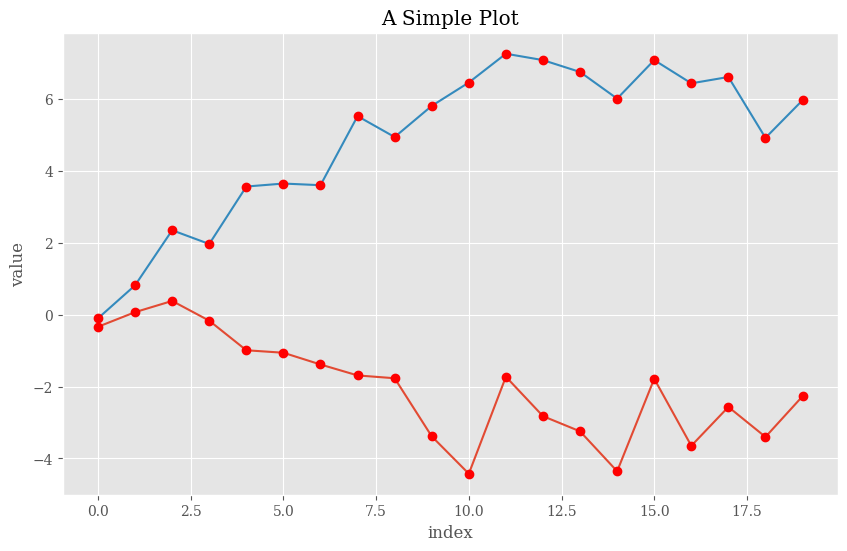

In [11]:
y = np.random.standard_normal((20, 2)).cumsum(axis=0)
plt.figure(figsize=(10, 6))
plt.plot(y, lw=1.5)
plt.plot(y, 'ro')
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Simple Plot')

Text(0.5, 1.0, 'A Simple Plot')

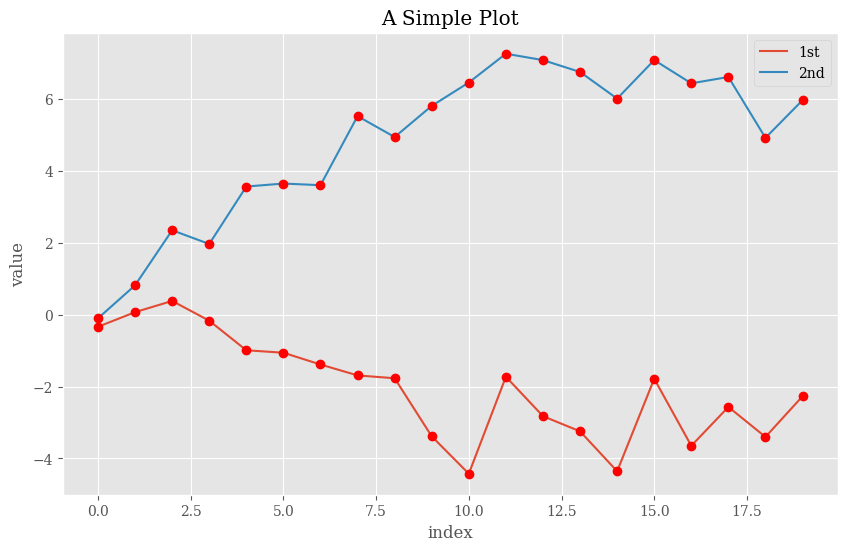

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(y[:, 0], lw=1.5, label='1st')
plt.plot(y[:, 1], lw=1.5, label='2nd')
plt.plot(y, 'ro')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.title('A Simple Plot')

刻度问题（scale）

In [13]:
y[:, 0] = y[:, 0] * 100

Text(0.5, 1.0, 'A Simple Plot')

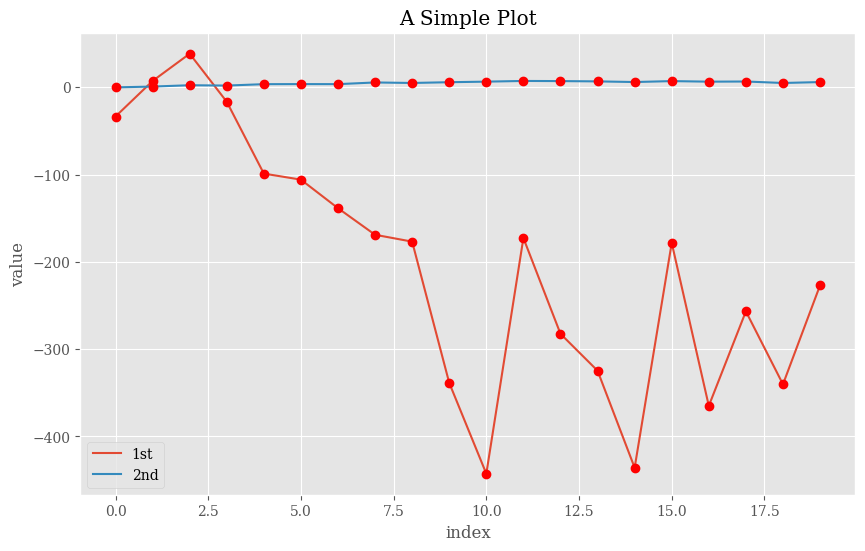

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(y[:, 0], lw=1.5, label='1st')
plt.plot(y[:, 1], lw=1.5, label='2nd')
plt.plot(y, 'ro')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.title('A Simple Plot')

通过绘图手段而非调整数据（例如通过改变刻度）来解决这个问题的基本方法有两种：
- Use of two y-axes (left/right)
- Use of two subplots (upper/lower, left/right) 

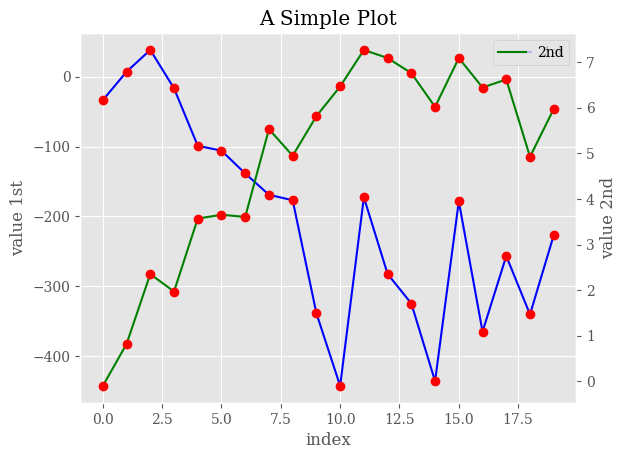

In [15]:
fig, ax1 = plt.subplots()
plt.plot(y[:, 0], 'b', lw=1.5, label='1st')
plt.plot(y[:, 0], 'ro')
plt.legend()
plt.xlabel('index')
plt.ylabel('value 1st')
plt.title('A Simple Plot')
# 生成与Axes1共享x轴的新Axes
ax2 = ax1.twinx()
plt.plot(y[:, 1], 'g', lw=1.5, label='2nd')
plt.plot(y[:, 1], 'ro')
plt.legend()
plt.ylabel('value 2nd')
# 需要去掉一个Axes的网格，不然太难看，两个网格交错无规律
plt.grid(False)

Text(0, 0.5, 'value')

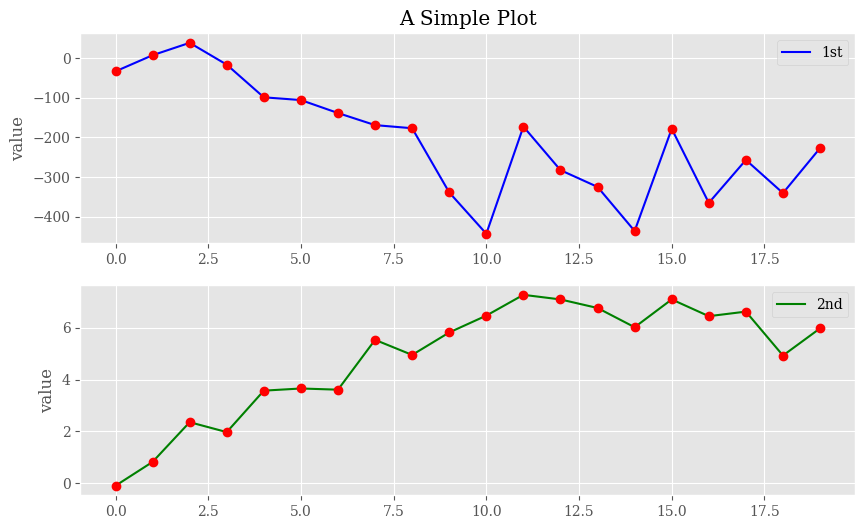

In [16]:
plt.figure(figsize=(10, 6))
plt.subplot(211)
plt.plot(y[:, 0], 'b', lw=1.5, label='1st')
plt.plot(y[:, 0], 'ro')
plt.legend()
plt.ylabel('value')
plt.title('A Simple Plot')
plt.subplot(212)
plt.plot(y[:, 1], 'g', lw=1.5, label='2nd')
plt.plot(y[:, 1], 'ro')
plt.legend()
plt.ylabel('value')

Text(0.5, 0, 'index')

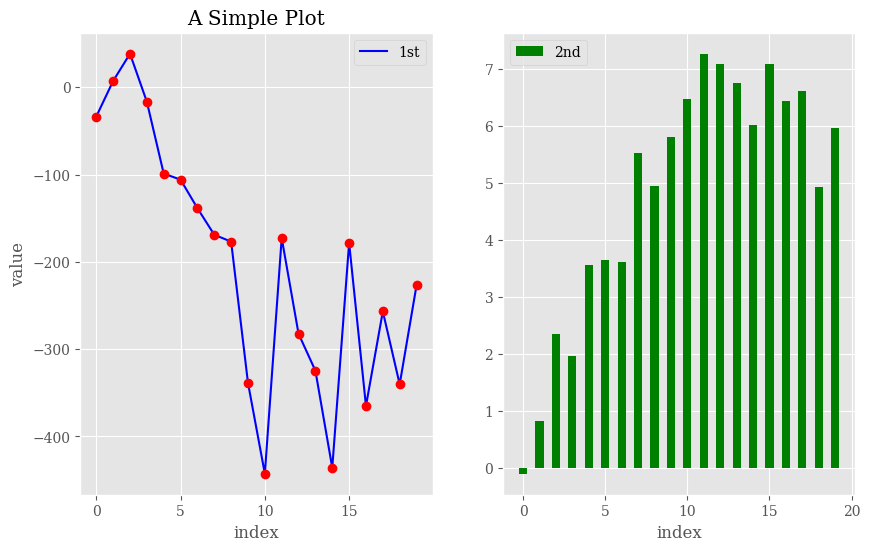

In [17]:
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.plot(y[:, 0], 'b', lw=1.5, label='1st')
plt.plot(y[:, 0], 'ro')
plt.legend()
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Simple Plot')
plt.subplot(122)
plt.bar(np.arange(len(y[:, 1])), y[:, 1], color='g', width=.5, label='2nd')
plt.legend()
plt.xlabel('index')

### 其他绘图样式

Text(0.5, 1.0, 'scatter plot')

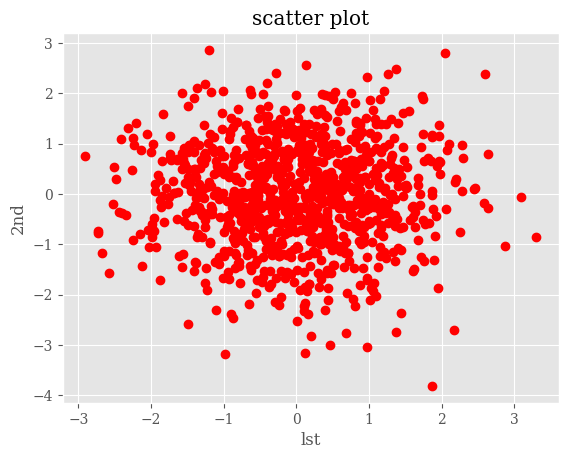

In [18]:
y = np.random.standard_normal((1000, 2))
plt.plot(y[:, 0], y[:, 1], 'ro')
plt.xlabel('lst')
plt.ylabel('2nd')
plt.title('scatter plot')

Text(0.5, 1.0, 'scatter plot')

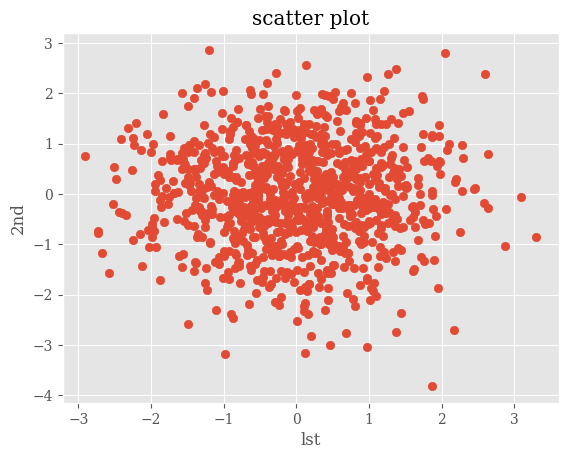

In [19]:
plt.figure()
plt.scatter(y[:, 0], y[:, 1])
plt.xlabel('lst')
plt.ylabel('2nd')
plt.title('scatter plot')

Text(0.5, 1.0, 'scatter plot')

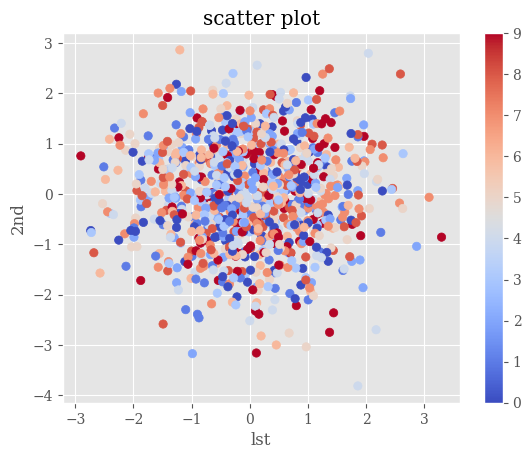

In [20]:
c = np.random.randint(0, 10, size=len(y))
plt.figure()
plt.scatter(y[:, 0], y[:, 1],
            c=c, cmap='coolwarm', marker='o')
plt.colorbar()
plt.xlabel('lst')
plt.ylabel('2nd')
plt.title('scatter plot')

Text(0.5, 1.0, 'Histogram')

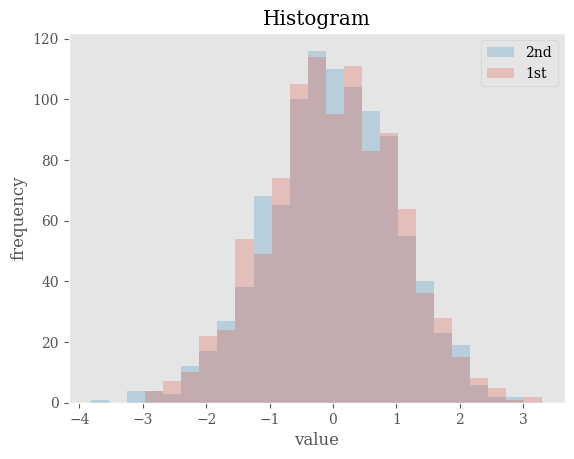

In [21]:
plt.figure()
plt.hist(y, label=['1st', '2nd'], bins=25, histtype='stepfilled', alpha=.25)
plt.grid(False)
plt.legend()
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Histogram')

Text(0.5, 1.0, 'Histogram')

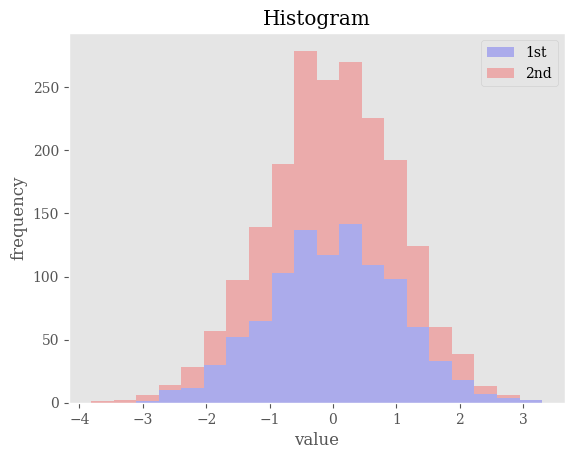

In [22]:
plt.figure()
plt.hist(y, label=['1st', '2nd'], color=['b', 'r'], bins=20, stacked=True, alpha=.25)
plt.grid(False)
plt.legend()
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Histogram')

Text(0.5, 1.0, 'Boxplot')

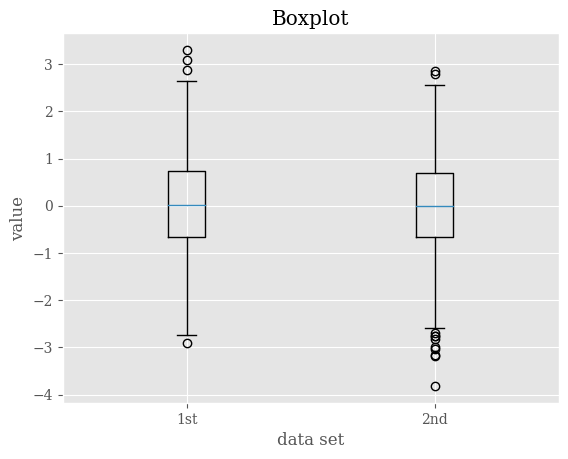

In [23]:
fig, ax = plt.subplots()
plt.boxplot(y)
plt.setp(ax, xticklabels=['1st', '2nd'])
plt.xlabel('data set')
plt.ylabel('value')
plt.title('Boxplot')

[None]

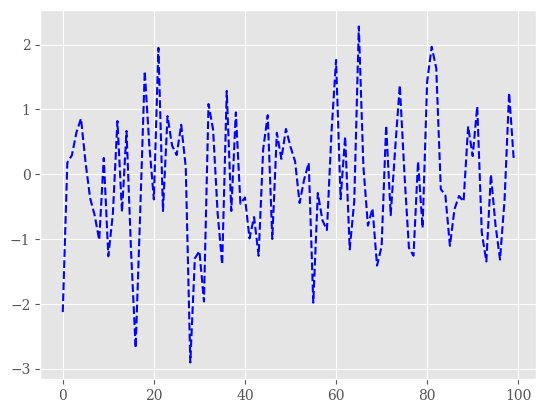

In [24]:
line = plt.plot(y[:100, 0], 'b')
plt.setp(line, linestyle='--')

In [25]:
line

In [26]:
def func(x):
    return .5 * np.exp(x) + 1
a, b = .5, 1.5
x = np.linspace(0, 2)
y = func(x)
Ix = np.linspace(a, b)
Iy = func(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]

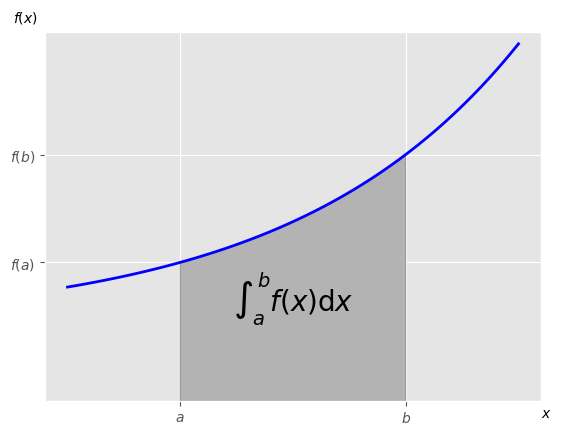

In [27]:
from matplotlib.patches import Polygon
fig, ax = plt.subplots()
plt.plot(x, y, 'b', linewidth=2)
plt.ylim(bottom=0)
poly = Polygon(verts, facecolor='.7', edgecolor='.5')
ax.add_patch(poly)
plt.text(.5 * (a + b), .5 * func(.5*(a+b)), r'$\int_a^b f(x)\mathrm{d}x$', 
         horizontalalignment='center', fontsize=20)
plt.figtext(.9, .075, r'$x$')
plt.figtext(.075, .9, r'$f(x)$')
# 刻度只保留下面的两个，这里是手动指定
ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks((func(a), func(b)))
ax.set_yticklabels(('$f(a)$', '$f(b)$'))
plt.show()

## 静态3D绘图

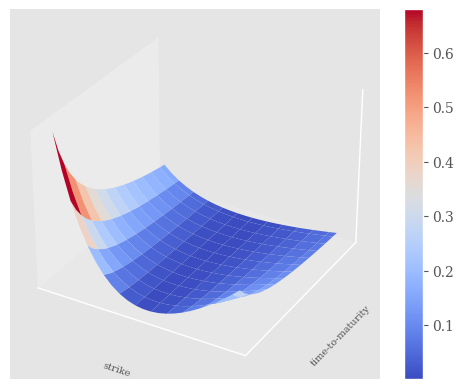

In [28]:
strike = np.linspace(50, 150, 24)
ttm = np.linspace(.5, 2.5, 24)
strike, ttm = np.meshgrid(strike, ttm)

iv = (strike - 100) ** 2 / (100 * strike) / ttm
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
surf = ax.plot_surface(strike, ttm, iv, rstride=2, cstride=2,
                       cmap=plt.cm.coolwarm, linewidth=.5, antialiased=True)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlabel('strike', fontsize=7)
ax.set_ylabel('time-to-maturity', fontsize=7)
# ax.set_zlabel('implied volatility', fontsize=10)
fig.colorbar(surf)
plt.show()

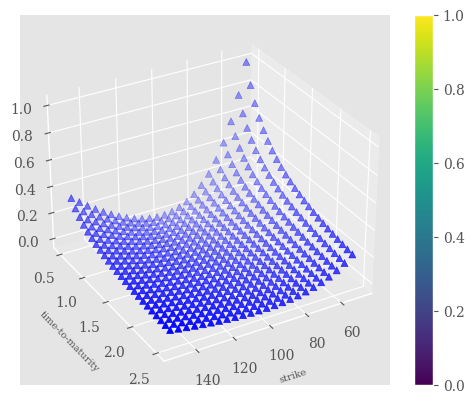

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 60)
surf = ax.scatter(strike, ttm, iv, zdir='z',
                  s=25, c='b', marker='^')
ax.set_xlabel('strike', fontsize=7)
ax.set_ylabel('time-to-maturity', fontsize=7)
# ax.set_zlabel('implied volatility', fontsize=10)
fig.colorbar(surf)
plt.show()

## 交互式2D绘图

In [30]:
import pandas as pd
import cufflinks as cf
cf.set_config_file(offline=True)

In [31]:
a = np.random.standard_normal((250, 5)).cumsum(axis=0)
index = pd.date_range('2019-01-01', freq='B', periods=len(a))
df = pd.DataFrame(100 + 5 * a, columns=list('abcde'), index=index)
df.tail()

,a,b,c,d,e
2019-12-10,62.599332,44.024702,100.313081,60.685574,40.229021
2019-12-11,62.204496,40.317470,103.863402,65.463010,37.930508
2019-12-12,55.086344,47.076406,93.000918,71.977965,41.394625
2019-12-13,54.032431,43.608232,93.680532,75.193815,41.232216
2019-12-16,49.416122,37.548562,87.114737,66.430210,39.050974


<Axes: >

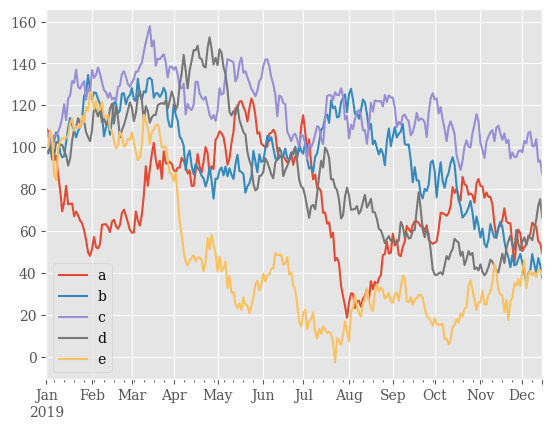

In [32]:
df.plot()

In [33]:
df.iplot()

In [37]:
df[['a', 'b']].iplot(
    theme='polar',
    title='A Time Series Plot',
    xTitle='date', yTitle='value', 
    mode={'a': 'markers', 'b': 'lines+markers'},
    symbol={'a': 'cross', 'b': 'diamond'},
    size=3.5,
    color={'a': 'blue', 'b': 'magenta'}
)

In [38]:
df.iplot(kind='hist',
         subplots=True,
         bins=15)

## 金融图表

In [40]:
raw = pd.read_csv('source/fxcm_eur_usd_eod_data.csv', index_col=0,
                  parse_dates=True)
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1547 entries, 2013-01-01 22:00:00 to 2017-12-31 22:00:00
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BidOpen   1547 non-null   float64
 1   BidHigh   1547 non-null   float64
 2   BidLow    1547 non-null   float64
 3   BidClose  1547 non-null   float64
 4   AskOpen   1547 non-null   float64
 5   AskHigh   1547 non-null   float64
 6   AskLow    1547 non-null   float64
 7   AskClose  1547 non-null   float64
dtypes: float64(8)
memory usage: 108.8 KB


In [44]:
quotes = raw[['AskOpen', 'AskHigh', 'AskLow', 'AskClose']]
quotes = quotes[-60:]
quotes.tail()

,AskOpen,AskHigh,AskLow,AskClose
2017-12-25 22:00:00,1.18667,1.18791,1.18467,1.18587
2017-12-26 22:00:00,1.18587,1.19104,1.18552,1.18885
2017-12-27 22:00:00,1.18885,1.19592,1.18885,1.19426
2017-12-28 22:00:00,1.19426,1.20256,1.19369,1.20092
2017-12-31 22:00:00,1.20092,1.20144,1.19994,1.20144


In [48]:
import plotly.offline as plyo

In [60]:
qf = cf.QuantFig(quotes, title='EUR/USD Exchange Rate',
                 legend='top', name='EUR/USD')
plyo.iplot(qf.iplot(asFigure=True),
           filename='qf_01')

In [61]:
# 向其增加布林线
qf.add_bollinger_bands(periods=15, boll_std=2)
plyo.iplot(qf.iplot(asFigure=True),
           filename='qf_02')

In [62]:
# 增加 RSI 线
qf.add_rsi(periods=14, showbands=False) # 不显示高线或者低线
plyo.iplot(qf.iplot(asFigure=True),
           filename='qf_03')

In [65]:
qf = cf.QuantFig(quotes, title='EUR/USD Exchange Rate',
                 name='EUR/USD')
qf.iplot()

In [66]:
qf.add_bollinger_bands(periods=15, boll_std=2)
qf.iplot()

In [67]:
qf.add_rsi(periods=14, showbands=False)
qf.iplot()